In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
x=np.linspace(-5,5,100)
y=np.sqrt(10**2-x**2)
X=np.hstack([x,-x])
Y=np.hstack([y,-y])

In [5]:
x1=np.linspace(-5,5,100)
y1=np.sqrt(5**2-x1**2)
X1=np.hstack([x1,-x1])
Y1=np.hstack([y1,-y1])

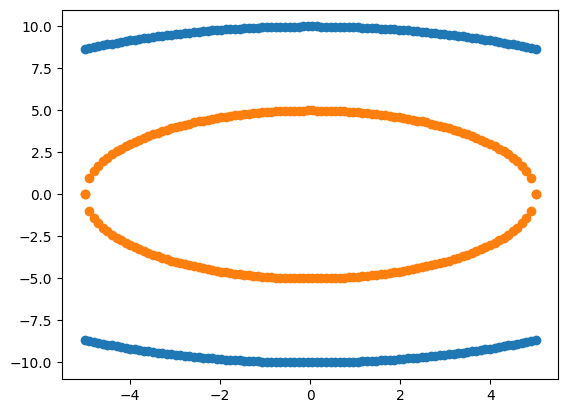

In [6]:
plt.scatter(X,Y)
plt.scatter(X1,Y1)

In [7]:
# Creating Dataframe - Blue line has dependent value 0, and orange one has 1
vert_stack=np.vstack([X,Y]).T
vert_stack
df1=pd.DataFrame(vert_stack,columns=['X1','X2'])
df1['Y']=0

In [8]:
vert_stack2=np.vstack([X1,Y1]).T
vert_stack2
df2=pd.DataFrame(vert_stack2,columns=['X1','X2'])
df2['Y']=1

In [9]:
df=pd.concat([df1,df2],ignore_index=True)

In [10]:
df

,X1,X2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0
...,...,...,...
395,-4.59596,-1.969049,1
396,-4.69697,-1.714198,1
397,-4.79798,-1.406908,1
398,-4.89899,-0.999949,1


### Create a Polynomial value columns - To learn Polynomial Kernel application in SVM

In [11]:
data=pd.DataFrame(
    {
        'x':[1,2],
        'y':[2,3]
    },index=None
)

In [12]:
data['X2']=data['x'].apply(lambda a:a*a)

In [13]:
data

,x,y,X2
0,1,2,1
1,2,3,4


In [14]:
data['Y2']=data['y'].apply(lambda a:a*a)

In [15]:
df['X12']=df['X1'].apply(lambda a:a*a)

In [16]:
df['X22']=df['X2'].apply(lambda a:a*a)

In [17]:
df['X1Y1']=df['X1']*df['X2']


In [18]:
df

,X1,X2,Y,X12,X22,X1Y1
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009
...,...,...,...,...,...,...
395,-4.59596,-1.969049,1,21.122845,3.877155,9.049671
396,-4.69697,-1.714198,1,22.061524,2.938476,8.051537
397,-4.79798,-1.406908,1,23.020610,1.979390,6.750316
398,-4.89899,-0.999949,1,24.000102,0.999898,4.898740


In [19]:
columList = list(df.columns)
columnListNew = columList[0:2] + columList[3:] + [columList[2]]
columnListNew

['X1', 'X2', 'X12', 'X22', 'X1Y1', 'Y']

In [20]:
df=df[columnListNew]

In [21]:
df

,X1,X2,X12,X22,X1Y1,Y
0,-5.00000,8.660254,25.000000,75.000000,-43.301270,0
1,-4.89899,8.717792,24.000102,75.999898,-42.708375,0
2,-4.79798,8.773790,23.020610,76.979390,-42.096467,0
3,-4.69697,8.828277,22.061524,77.938476,-41.466150,0
4,-4.59596,8.881281,21.122845,78.877155,-40.818009,0
...,...,...,...,...,...,...
395,-4.59596,-1.969049,21.122845,3.877155,9.049671,1
396,-4.69697,-1.714198,22.061524,2.938476,8.051537,1
397,-4.79798,-1.406908,23.020610,1.979390,6.750316,1
398,-4.89899,-0.999949,24.000102,0.999898,4.898740,1


In [22]:
data_x=df.iloc[:,[2,3,4]]

In [23]:
data_y=df['Y']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [25]:
from sklearn.svm import SVC
model=SVC(C=1.0,
    kernel='linear')

In [26]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
y_predict=model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score


In [29]:
accuracy_score(y_test,y_predict)

1.0

In [30]:
import seaborn as sns
data=sns.load_dataset('tips')

In [31]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
dependent_varlist=data.columns

In [33]:
dependent_varlist = ['tip', 'sex', 'smoker', 'day', 'time', 'size']
indepenedent_var="total_bill"


In [34]:
X=data[dependent_varlist]
y=data[indepenedent_var]

In [35]:
from sklearn.model_selection import train_test_split
Xtrain,ytrain,Xtest,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
smoker_data=data.groupby(['sex','day'])['smoker'].count()

C:\Users\aswinp\AppData\Local\Temp\ipykernel_5776\2726412954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_data=data.groupby(['sex','day'])['smoker'].count()


In [47]:
smoker_data


sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: smoker, dtype: int64

In [48]:
df_smoker=smoker_data.reset_index()

In [49]:
df_smoker

,sex,day,smoker
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [50]:
df_smoker.rename(columns={'smoker':'smoker_count'},inplace=True)

In [51]:
df_smoker

,sex,day,smoker_count
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [52]:
sns.heatmap(data=df_smoker,)

ValueError: could not convert string to float: 'Male'